#### Leer el archivo "PB_malignant_cells.csv" como un *dataframe* llamado cells

In [5]:
df =  pd.read_csv('C:/Users/Diosimar Cardoza/Desktop/Data_Science_AI/DataSets/PB_malignant_cells.csv')

#### Mostrar la parte superior (head) del dataframe

In [12]:
df.head()

,entidad,tipo_celula,entidad_original,tipo_celula_base,historia,frotis,archivos,B_S1_Kurtosis_cel,Perimeter_nuc,EquivDiameter_cel,...,B_S1_Std_cel,R_S1_Std_cyt,M_S1_Mean_nuc,R_GFIO_mean12_cyt,Pgra_V_skew_cel,Gra_v_skew_cel,u_S1_Energy1_cel,S_S2_Correlation_nuc,Z_S1_Entropy1_cel,LBP_Ye_5
0,SS,ATYPICAL_LYMPHOCYTE,SEZARY_LUTZNER,ATYPICAL_LYMPHOCYTE,222,2014-01-14,LY_6791321.jpg,-0.651187,306.982,110.713491,...,17.329100,15.783724,228.961434,4331.892448,0.241857,0.561180,0.083721,0.745196,4.668592,0.113269
1,FL,ATYPICAL_LYMPHOCYTE,LF,ATYPICAL_LYMPHOCYTE,403,2012-01-01,OTH_3622187.jpg,1.676338,247.428,83.385617,...,9.753866,0.000000,235.193207,NaN,0.025889,0.453441,0.083170,0.780979,3.823330,0.148906
2,PL,ATYPICAL_LYMPHOCYTE,LPB,PROLYMPHOCYTE,240,2014-06-25,OTH_8150226.jpg,-0.204922,361.392,131.996250,...,13.199502,26.476994,222.718684,6699.064412,0.289952,0.634905,0.068603,0.758655,4.429394,0.113554
3,FL,ATYPICAL_LYMPHOCYTE,LF,ATYPICAL_LYMPHOCYTE,123,2016-08-29,OTH_130496.jpg,1.663533,250.066,83.857629,...,11.127840,13.495678,233.749268,6182.564548,0.002747,0.545122,0.081492,0.765979,4.005777,0.149711
4,SS,ATYPICAL_LYMPHOCYTE,SEZARY_TIPICO,ATYPICAL_LYMPHOCYTE,154,2016-03-29,SEC_94246.jpg,0.949263,359.192,122.505814,...,15.883791,19.040232,238.721695,3990.031655,0.101960,0.496800,0.108402,0.723192,4.339821,0.202658


#### Use el método .info () para averiguar cuántas entradas hay

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 147 entries, entidad to LBP_Ye_5
dtypes: float64(139), int64(2), object(6)
memory usage: 1.1+ MB


#### Muestre los tipos de datos para las primeras 20 columnas

In [19]:
df.dtypes[0:21]

entidad                  object
tipo_celula              object
entidad_original         object
tipo_celula_base         object
historia                  int64
frotis                   object
archivos                 object
B_S1_Kurtosis_cel       float64
Perimeter_nuc           float64
EquivDiameter_cel       float64
Z_S2_Correlation_cel    float64
B_S1_Skewness_cel       float64
B_S2_CluShade_cel       float64
Pgra_S_std_cyt          float64
M_S1_Mean_cyt           float64
u_S1_Std_cyt            float64
Pgra_S_kurto_cel        float64
v_S1_Skewness_cel       float64
a_S1_Skewness_cel       float64
Pgra_C_mean_cel         float64
M_S2_Homogeneity_cel    float64
dtype: object

#### ¿Cúal es la frecuencia (número de veces) para cada *entidad*?

In [22]:
df.entidad.value_counts()

BL      233
MCL     148
CLL      96
FL       78
APL      73
SS       70
SMZL     57
PL       54
RL       47
LGL      45
N        40
HCL      33
PC       26
Name: entidad, dtype: int64

#### ¿Cúal es la media del perímetro del núcleo (Perimeter_nuc)?

In [20]:
df.Perimeter_nuc.mean()

341.034046

#### ¿Cúal es el valor más alto de la relación núcleo-célula (NCellratio)?

In [21]:
df.NCellratio.max()

0.945292392410367

#### ¿A qué tipo de célula base pertenece la imagen de la célula con nombre de archivo *LY_29167.jpg*?

In [24]:
df[df.archivos == 'LY_29167.jpg'].tipo_celula_base

708    ATYPICAL_LYMPHOCYTE
Name: tipo_celula_base, dtype: object

#### ¿Cúal es el nombre de archivo de la célula con el descriptor *Hairiness* más bajo (primera ocurrencia del valor) ?

In [45]:
df[ df.Hairiness == df.Hairiness.min() ].archivos.iloc[0]

'OTH_3622187.jpg'

#### ¿Cuántos descriptores no presentan una indeterminación (NaN)?

In [10]:
lista  = pd.DataFrame(df.isnull().sum(axis = 0))
lista[lista[0] == 0].shape[0]

133

#### ¿Cúal es la media del diámetro equivalente celular (EquivDiameter_cel) por tipo de célula (tipo_celula)?
Sugerencia: usar el método ```groupby```

In [11]:
df.groupby('tipo_celula')['EquivDiameter_cel'].mean()

tipo_celula
ATYPICAL_LYMPHOCYTE      114.254805
ATYPICAL_PROMYELOCYTE    142.105527
BLAST                    133.661759
LYMPHOCYTE               101.145910
VARIANT_LYMPHOCYTE       148.959391
Name: EquivDiameter_cel, dtype: float64

#### ¿Cuántos pacientes hay? 
Sugerencia: encontrar el número de historias únicas (las historias se repiten por célula y por frotis)

In [20]:
len((df.historia).unique())

271

#### ¿Cuáles fueron los cinco días en que más se tomaron frotis?

In [51]:
df.groupby('frotis')['frotis'].agg('count').sort_values().nlargest(5)

frotis
2015-09-17    14
2012-09-12    12
2015-11-06    11
2015-01-30    11
2015-11-09    10
Name: frotis, dtype: int64

#### ¿Cuántos frotis tienen sólo un linfocito variante (tipo de célula VARIANT_LYMPHOCYTE)? 

In [62]:
linfocito_V = df[df.tipo_celula=='VARIANT_LYMPHOCYTE']
sum(linfocito_V.groupby(['frotis','tipo_celula'])['tipo_celula'].agg('count').sort_values() == 1)

26

¿Cuántos nombres de archivos comienzan con las letras *OTH*?

354

#### Realice la siguiente gráfica de boxplot usando sólo pandas

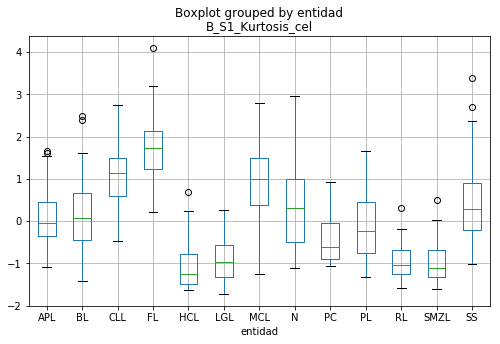

In [14]:

df.boxplot(column=['B_S1_Kurtosis_cel'],by='entidad')

#### Haga el conteo de células por entidad para cada tipo de célula. 
Sugerencia: combine el método `group_by` y `value_counts()`

In [16]:
df.groupby(['tipo_celula'])['entidad'].value_counts()

tipo_celula            entidad
ATYPICAL_LYMPHOCYTE    MCL        148
                       CLL         96
                       FL          78
                       SS          70
                       SMZL        57
                       PL          54
                       LGL         45
                       HCL         33
                       PC          26
ATYPICAL_PROMYELOCYTE  APL         73
BLAST                  BL         233
LYMPHOCYTE             N           40
VARIANT_LYMPHOCYTE     RL          47
Name: entidad, dtype: int64

####  Cree un nuevo dataset con sólo los tipos de células BLAST y VARIANT_LYMPHOCYTE
Note que los índices están "reseteados"

In [36]:
data = df.query("tipo_celula == 'BLAST' | tipo_celula == 'VARIANT_LYMPHOCYTE'") 
data.reset_index()

,entidad,tipo_celula,entidad_original,tipo_celula_base,historia,frotis,archivos,B_S1_Kurtosis_cel,Perimeter_nuc,EquivDiameter_cel,...,B_S1_Std_cel,R_S1_Std_cyt,M_S1_Mean_nuc,R_GFIO_mean12_cyt,Pgra_V_skew_cel,Gra_v_skew_cel,u_S1_Energy1_cel,S_S2_Correlation_nuc,Z_S1_Entropy1_cel,LBP_Ye_5
0,BL,BLAST,LAM_MONOCITICA,BLAST,258,2014-12-09,BL_10915797.jpg,-0.638353,400.318,148.813492,...,17.655124,23.585250,209.262633,4834.761704,0.976668,0.503784,0.076819,0.787807,5.031631,0.154609
1,BL,BLAST,LAM_MIELOIDE,BLAST,251,2014-10-23,BL_9612547.jpg,1.606027,323.224,108.775986,...,12.748571,11.740019,226.856114,5290.005880,0.414525,0.699335,0.084920,0.724236,4.251004,0.125503
2,BL,BLAST,LAM_MIELOIDE,BLAST,115,2014-01-17,BL_6823461.jpg,0.026675,406.482,133.096137,...,15.088541,31.831007,216.422626,6486.873684,0.817050,0.851206,0.073070,0.738312,4.649981,0.149863
3,BL,BLAST,LAL-T,BLAST,273,2015-04-24,BL_11949816.jpg,-0.068850,370.242,133.759344,...,13.723244,32.014159,221.426162,5976.568115,0.499587,0.878222,0.073722,0.728310,4.511485,0.104347
4,BL,BLAST,LAM_MONOCITICA,BLAST,292,2015-11-16,BL_14949726.jpg,-0.740971,427.256,157.658436,...,15.572944,23.839569,210.540738,4237.802717,1.071683,0.987251,0.071071,0.698971,4.773240,0.138746
5,BL,BLAST,LAL-B_NO_BURKITT,BLAST,73,2014-12-19,BL_10914085.jpg,1.265949,355.554,116.102485,...,13.126922,32.346139,225.245583,4235.059640,0.330916,0.641549,0.078892,0.750965,4.328620,0.143422
6,BL,BLAST,LAM_MIELOMONOCITICA,BLAST,345,2014-02-24,BL_7113519.jpg,-0.403593,411.062,130.072315,...,15.706554,14.113490,220.099683,3509.989573,0.574618,0.857437,0.077483,0.734249,4.620889,0.115843
7,BL,BLAST,LAM_MIELOIDE,BLAST,308,2016-02-10,BL_67554.jpg,-0.241757,367.926,135.259673,...,14.855305,29.150508,226.738030,7224.741975,0.589239,0.697839,0.073176,0.727435,4.521040,0.169360
8,BL,BLAST,LAL-B_NO_BURKITT,BLAST,439,2014-07-14,SMU_8376884.jpg,2.492806,309.248,103.639031,...,12.505609,22.049718,227.794032,5331.341041,0.401173,0.912621,0.075267,0.713448,4.203389,0.102055
9,BL,BLAST,LAL-T,BLAST,273,2015-05-06,BL_12080043.jpg,-0.464505,385.220,143.090758,...,14.673869,24.716614,215.256483,4227.927179,0.552545,0.864281,0.066267,0.745552,4.625529,0.064787
